In [1]:
using Revise, DeconvOptim, TestImages, Noise, CUDA, ImageShow, Colors
CUDA.allowscalar(false);

h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    Gray.(img)
end

h_view (generic function with 1 method)

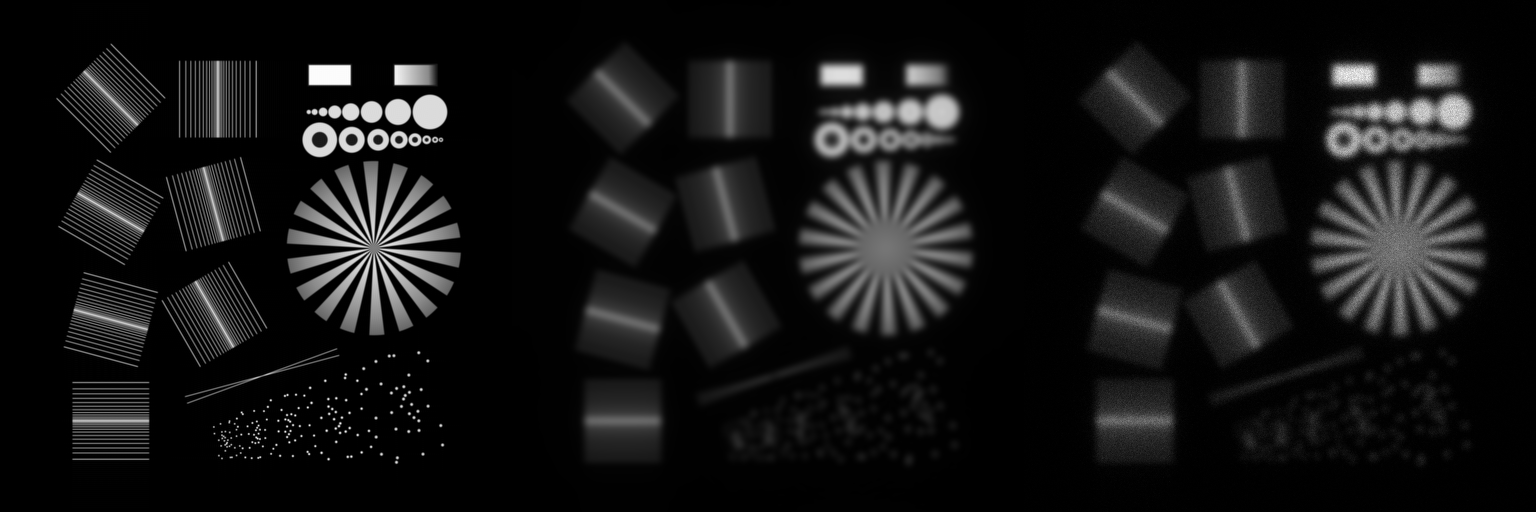

In [2]:
# load test images
img = convert(Array{Float32}, Float32.(testimage("resolution_test_512")))

psf = Float32.(generate_psf(size(img), 30))
psf_c = CuArray(psf)
# create a blurred, noisy version of that image
img_b = conv_psf(img, psf)
img_n = poisson(img_b, 300);

img_n_c = CuArray(img_n)
h_view(img, img_b, img_n)

In [3]:
@time resG, optim_res = deconvolution(img_n, psf, loss=Poisson(), regularizer=nothing, iterations=10)

 22.091502 seconds (98.19 M allocations: 5.829 GiB, 5.52% gc time)


(Float32[3.005322f-5 2.0148698f-5 … 3.8459726f-5 3.610715f-5; 2.0997199f-5 9.72125f-6 … 3.520978f-5 3.0168952f-5; … ; 3.7872924f-5 3.3778782f-5 … 3.8501574f-5 3.8974f-5; 3.5570018f-5 2.8739707f-5 … 3.8877108f-5 3.853178f-5],  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.406981e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.74e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.00e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.27e+00 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.19e-05 ≰ 0.0e+00
    |g(x)|                 = 3.11e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    10
    f(x) calls:    31
    ∇f(x) calls:   31
)

In [ ]:
@time resG_c, optim_res_c = deconvolution(img_n_c, psf_c, loss=Poisson(), regularizer=nothing, iterations=10)

In [ ]:
h_view(Array(img_n_c), Array(resG_c), Array(resG))